<a href="https://colab.research.google.com/github/lalitha-sahitya/Handwritten-digit-recognition/blob/main/Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
len(x_train)

60000

In [35]:
len(x_test)

10000

In [36]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [37]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

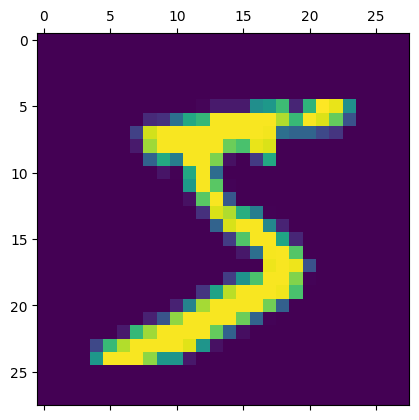

In [38]:
plt.matshow(x_train[0])

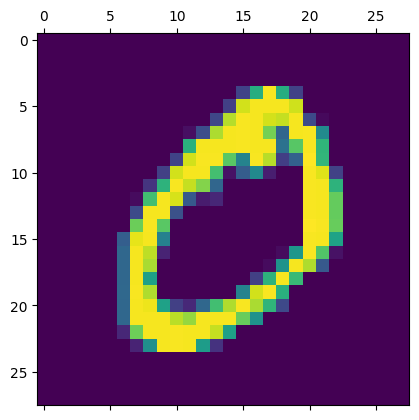

In [39]:
plt.matshow(x_train[1])

In [40]:
y_train[1]

0

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
x_train=x_train/255
x_test=x_test/255

In [43]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [44]:
x_test.shape

(10000, 28, 28)

In [45]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [46]:
x_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [47]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.5073 - loss: 2.2440
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.6902 - loss: 2.0262
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 876us/step - accuracy: 0.7284 - loss: 1.8325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7586 - loss: 1.6641
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7723 - loss: 1.5169


In [48]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7747 - loss: 1.4572


[1.4035403728485107, 0.8037999868392944]

In [49]:
y_preds=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


In [50]:
np.argmax(y_preds[0])

7

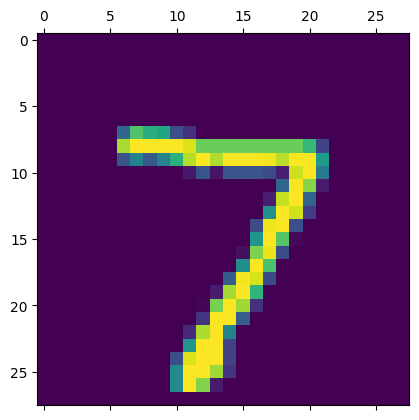

In [51]:
plt.matshow(x_test[0])

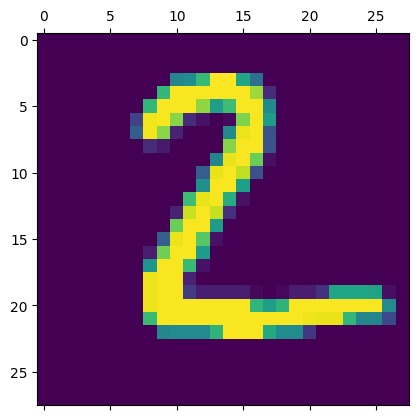

In [52]:
plt.matshow(x_test[1])

In [53]:
np.argmax(y_preds[1])

2

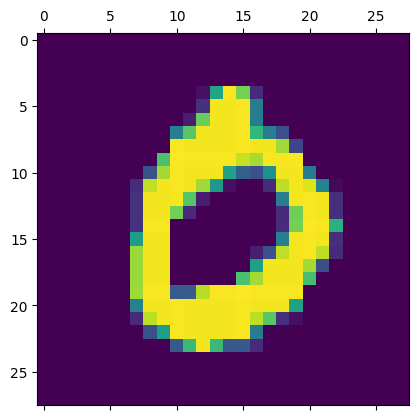

In [54]:
plt.matshow(x_test[3])

In [55]:
np.argmax(y_test[2])

0

In [59]:
y_predicted=[np.argmax(i) for i in y_preds]
y_predicted[:5]

[7, 2, 1, 0, 4]

In [60]:
cf=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 929,    2,    5,    8,    0,    3,   25,    1,    7,    0],
       [   0, 1109,    5,    3,    0,    0,    3,    0,   15,    0],
       [  19,   90,  789,   26,   15,    0,   30,   22,   40,    1],
       [   7,   52,   26,  854,    1,    2,    5,   22,   32,    9],
       [   2,   50,    3,    0,  770,    0,   30,    9,    4,  114],
       [  38,  114,    5,  196,   29,  388,   26,   37,   32,   27],
       [  28,   48,    6,    0,   13,   10,  850,    0,    3,    0],
       [   2,   73,   12,    2,    9,    0,    3,  899,    7,   21],
       [  22,   90,    7,   86,   12,    5,   16,   24,  686,   26],
       [  23,   44,    5,    9,   67,    0,    1,   86,   10,  764]],
      dtype=int32)>

<Axes: >

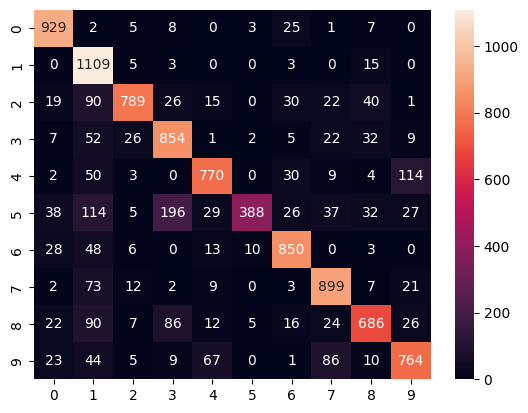

In [61]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [67]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5545 - loss: 1.7479
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8538 - loss: 0.5831
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8850 - loss: 0.4277
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8992 - loss: 0.3621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9067 - loss: 0.3323


In [68]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8979 - loss: 0.3536


[0.3104001581668854, 0.911899983882904]

In [73]:
y_preds1=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step


In [77]:
y_predicted=[np.argmax(i) for i in y_preds1]
y_predicted[:5]

[7, 2, 1, 0, 4]

In [78]:
cf=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    3,    2,    0,    4,    9,    1,    3,    0],
       [   0, 1108,    0,    4,    0,    2,    4,    1,   16,    0],
       [  11,   10,  908,   23,   13,    1,   13,   11,   38,    4],
       [   2,    1,   17,  924,    0,   25,    2,   16,   17,    6],
       [   2,    5,    5,    1,  909,    1,   15,    2,    6,   36],
       [  11,    3,    5,   49,   10,  759,   17,    8,   24,    6],
       [  15,    3,    5,    1,   11,   16,  904,    0,    3,    0],
       [   4,   13,   24,    8,    8,    0,    0,  924,    3,   44],
       [  11,    6,   10,   37,   12,   34,   13,    6,  828,   17],
       [  15,    9,    2,   15,   37,    8,    0,   21,    5,  897]],
      dtype=int32)>

<Axes: >

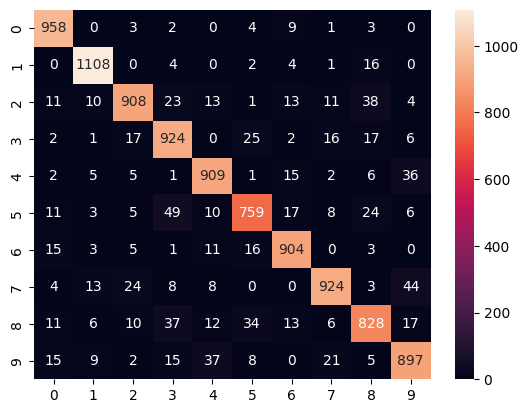

In [79]:
sns.heatmap(cf,annot=True,fmt='d')